### Machine Learning: Classification, Regression and Clustering

the steps of a typical machine-learning case study, including:

    loading the dataset

    exploring the data with pandas and visualizations

    transforming your data (converting non-numeric data to numeric data because scikit-learn requires numeric data; in the chapter, we use datasets that are “ready to go,” but we’ll discuss the issue again in the “Deep Learning” chapter)

    splitting the data for training and testing

    creating the model

    training and testing the model

    tuning the model and evaluating its accuracy

    making predictions on live data that the model hasn’t seen before.


#### Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1

In [88]:
from sklearn.datasets import load_digits

In [89]:
digits = load_digits()

In [90]:
print('hi')

hi


In [91]:
digits.data.shape

(1797, 64)

In [92]:
digits.target.shape

(1797,)

In [93]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [94]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [95]:
import matplotlib.pyplot   as plt

In [96]:
%matplotlib inline

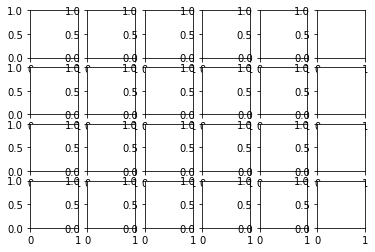

In [97]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [98]:
import numpy as np

In [99]:
 for item in zip(axes.ravel(), digits.images, digits.target):
    ...:     axes, image, target = item
    ...:     axes.imshow(image, cmap=plt.cm.gray_r)
    ...:     axes.set_xticks([])  #   remove x-axis tick marks
    ...:     axes.set_yticks([])  #   remove y-axis tick marks
    ...:     axes.set_title(target)
    ...: plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [100]:
from   sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test =   train_test_split(
   ...:     digits.data, digits.target, random_state=11)

In [102]:
X_train.shape

(1347, 64)

In [103]:
X_test.shape

(450, 64)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()

In [106]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
predicted = knn.predict(X=X_test)

In [108]:
expected = y_test

In [109]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [110]:
expected[0:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [111]:
wrong = [(p, e)   for (p, e) in zip(predicted, expected) if p != e]

In [112]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

#### Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

In [113]:
print(f'{knn.score(X_test,   y_test):.2%}')

97.78%


In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion = confusion_matrix(y_true=expected,   y_pred=predicted)

In [116]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report

In [118]:
names = [str(digit) for   digit in digits.target_names]

In [119]:
print(classification_report(expected, predicted,
    ...:       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



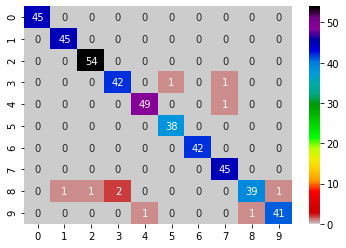

In [120]:
import pandas as pd

confusion_df = pd.DataFrame(confusion,   index=range(10), columns=range(10))


import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [121]:
from   sklearn.model_selection import KFold

In [122]:
kfold = KFold(n_splits=10,   random_state=11, shuffle=True)

In [123]:
from sklearn.model_selection   import cross_val_score

In [124]:
scores = cross_val_score(estimator=knn,   X=digits.data,
    ...:     y=digits.target, cv=kfold)

In [125]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [126]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [127]:
print(f'Accuracy standard   deviation: {scores.std():.2%}')

Accuracy standard   deviation: 0.75%


#### Running Multiple Models to Find the Best One

In [128]:
from sklearn.svm import SVC

In [129]:
from   sklearn.naive_bayes import GaussianNB

In [130]:
estimators = {
    ...:     'KNeighborsClassifier':   knn,
    ...:     'SVC': SVC(gamma='scale'),
    ...:     'GaussianNB':   GaussianNB()}

In [131]:
for estimator_name,   estimator_object in estimators.items():
    ...:     kfold = KFold(n_splits=10,   random_state=11, shuffle=True)
    ...:     scores =   cross_val_score(estimator=estimator_object,
    ...:         X=digits.data, y=digits.target, cv=kfold)
    ...:     print(f'{estimator_name:>20}: ' +
    ...:           f'mean accuracy={scores.mean():.2%}; ' +
    ...:           f'standard   deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard   deviation=0.75%
                 SVC: mean accuracy=98.72%; standard   deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard   deviation=3.47%


Scikit-Learn Estimator Diagram

The scikit-learn documentation provides a helpful diagram for choosing the right estimator, based on the kind and size of your data and the machine learning task you wish to perform:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### Hyperparameter Tuning

In [132]:
for k in range(1, 20, 2):
    ...:     kfold = KFold(n_splits=10,   random_state=11, shuffle=True)
    ...:     knn = KNeighborsClassifier(n_neighbors=k)
    ...:     scores = cross_val_score(estimator=knn,
    ...:         X=digits.data, y=digits.target, cv=kfold)
    ...:     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    ...:           f'standard   deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard   deviation=0.58%
k=3 ; mean accuracy=98.78%; standard   deviation=0.78%
k=5 ; mean accuracy=98.72%; standard   deviation=0.75%
k=7 ; mean accuracy=98.44%; standard   deviation=0.96%
k=9 ; mean accuracy=98.39%; standard   deviation=0.80%
k=11; mean accuracy=98.39%; standard   deviation=0.80%
k=13; mean accuracy=97.89%; standard   deviation=0.89%
k=15; mean accuracy=97.89%; standard   deviation=1.02%
k=17; mean accuracy=97.50%; standard   deviation=1.00%
k=19; mean accuracy=97.66%; standard   deviation=0.96%


#### Case Study: Time Series and Simple Linear Regression

In [133]:
import pandas as pd

In [134]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date',   'Temperature', 'Anomaly']

nyc['Date'] = nyc['Date'].floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [135]:
from sklearn.model_selection   import train_test_split

In [136]:
X_train, X_test, y_train, y_test =   train_test_split(
   ...:     nyc.Date.values.reshape(-1,   1), nyc.Temperature.values,
   ...:     random_state=11)

In [137]:
X_train.shape

(93, 1)

In [138]:
X_test.shape

(31, 1)

In [139]:
from sklearn.linear_model   import LinearRegression

In [140]:
linear_regression = LinearRegression()

In [141]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
linear_regression.coef_

array([0.01939167])

In [143]:
linear_regression.intercept_

-0.30779820252656265

In [144]:
predicted = linear_regression.predict(X_test)

In [145]:
expected = y_test

In [146]:
for p, e in zip(predicted[::5],   expected[::5]):
    ...:     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [147]:
predict = (lambda x:   linear_regression.coef_ * x +
    ...:                      linear_regression.intercept_)

In [149]:
predict(2020)

array([38.86338185])

In [150]:
import seaborn as sns


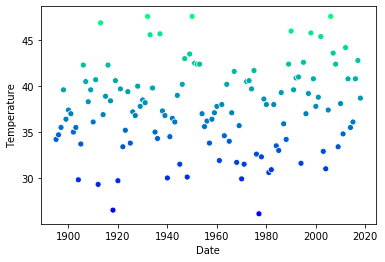

In [151]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    ...:     hue='Temperature',   palette='winter', legend=False)

In [152]:
axes.set_ylim(10, 70)

(10, 70)

In [153]:
x = np.array([min(nyc.Date.values),   max(nyc.Date.values)])

In [154]:
x

array([1895, 2018], dtype=int64)

In [155]:
y = predict(x)

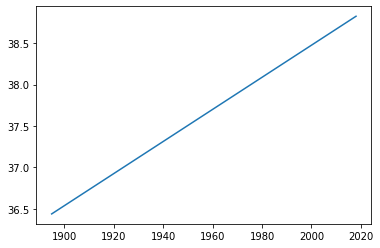

In [156]:
line = plt.plot(x, y)

#### Case Study: Multiple Linear Regression with the California Housing Dataset

In [157]:
from sklearn.datasets import fetch_california_housing

In [158]:
california = fetch_california_housing()

In [159]:
california.data.shape

(20640, 8)

In [160]:
california.target.shape

(20640,)

In [161]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [162]:
california_df = pd.DataFrame(california.data,
    ...:                                columns=california.feature_names)

In [163]:
california_df['MedHouseValue']   = pd.Series(california.target)

In [164]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [165]:
sample_df = california_df.sample(frac=0.1, random_state=17)

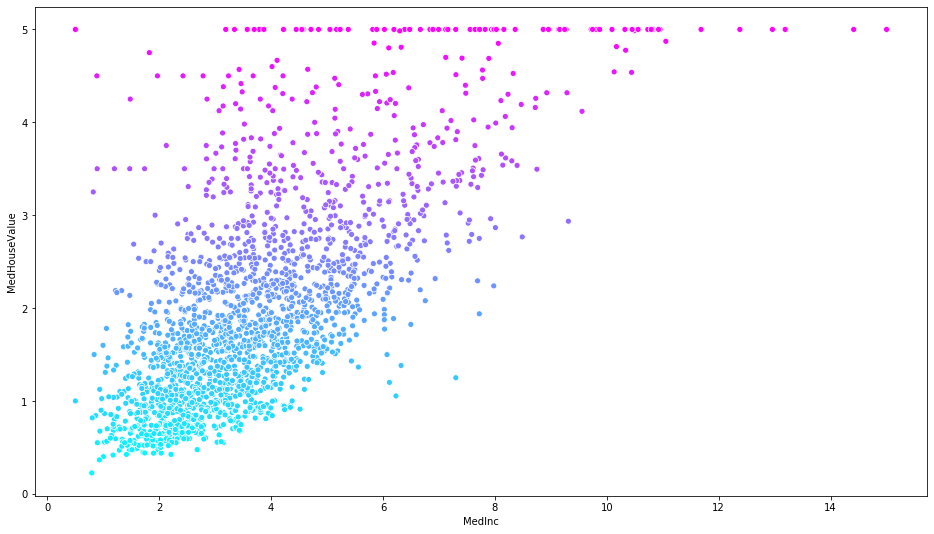

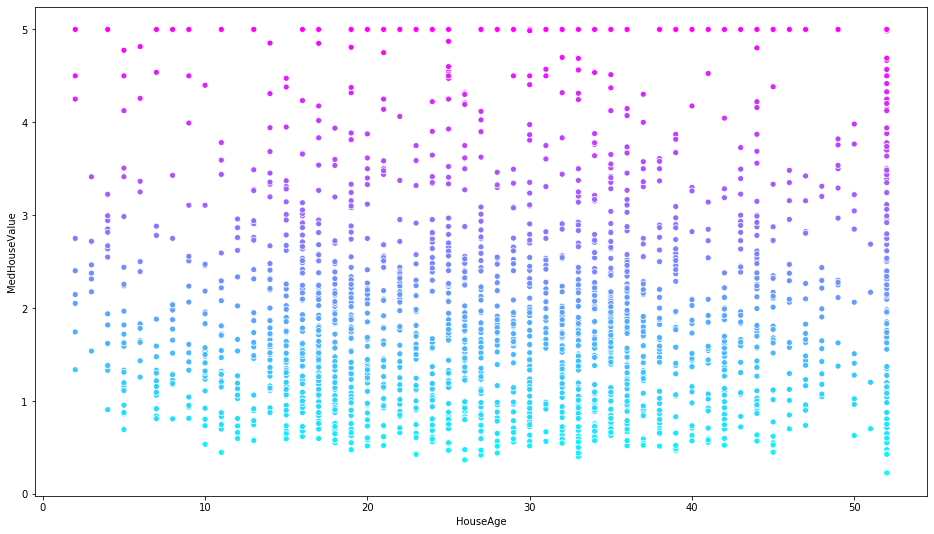

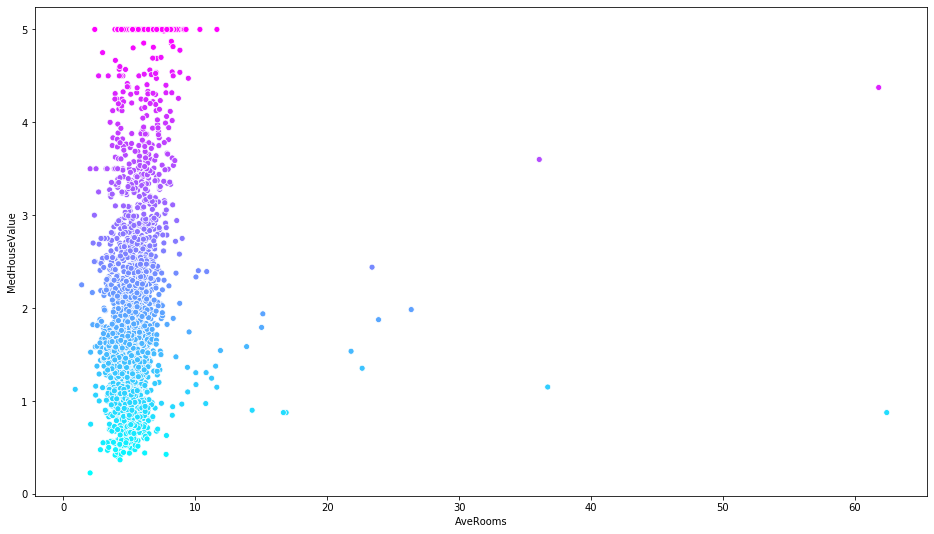

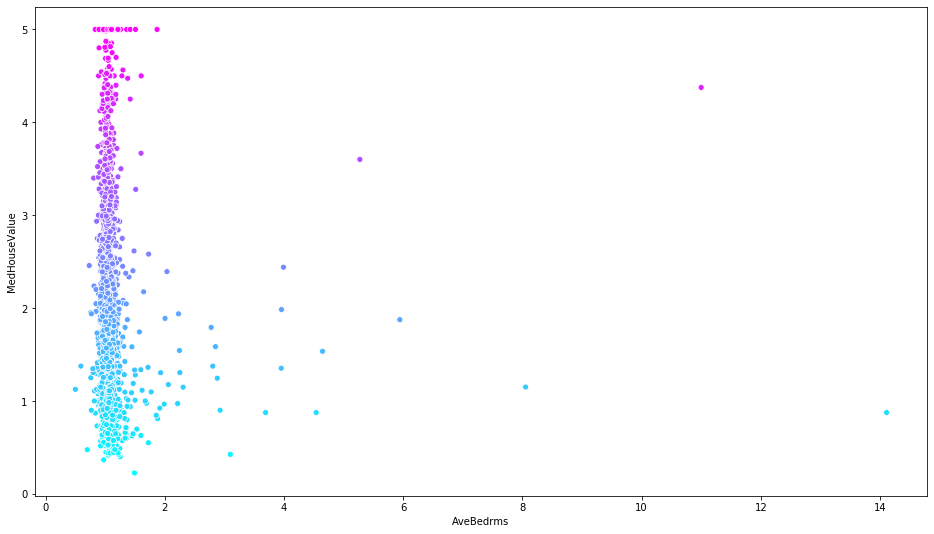

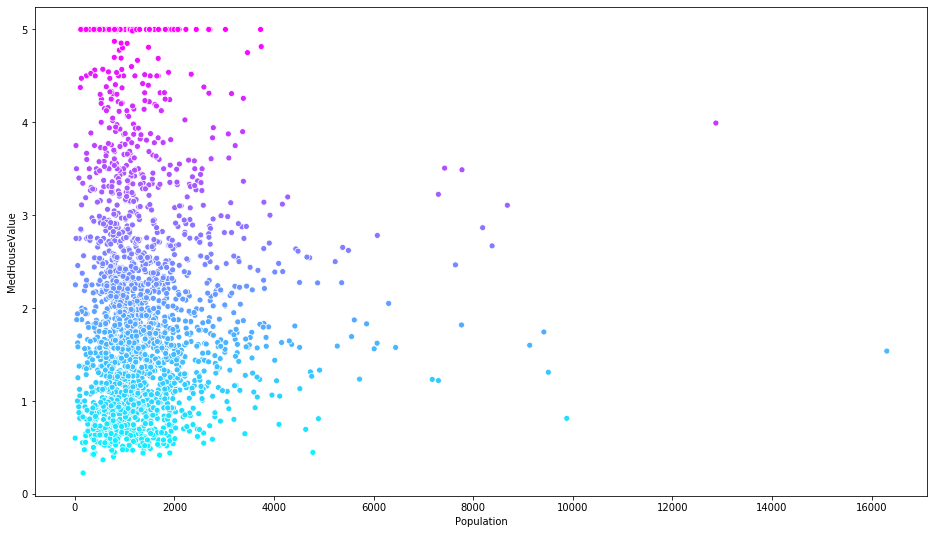

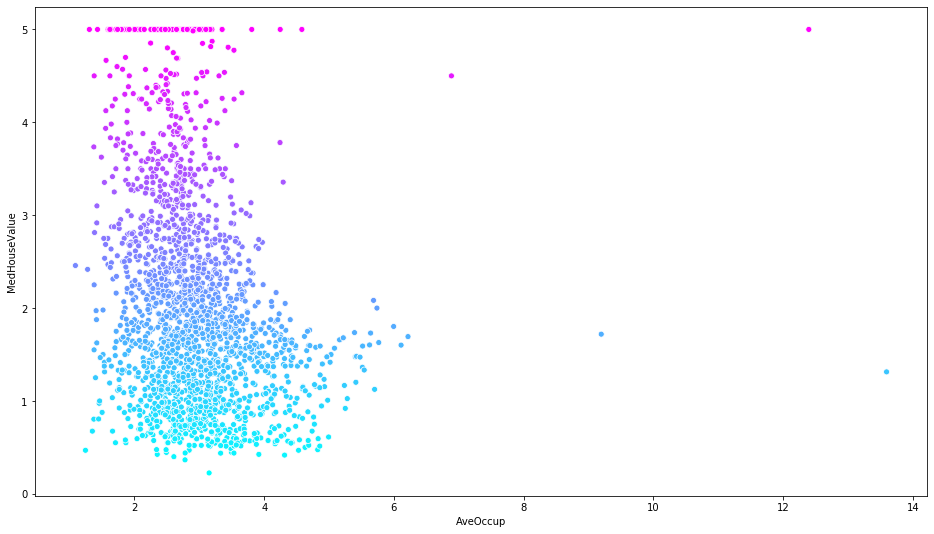

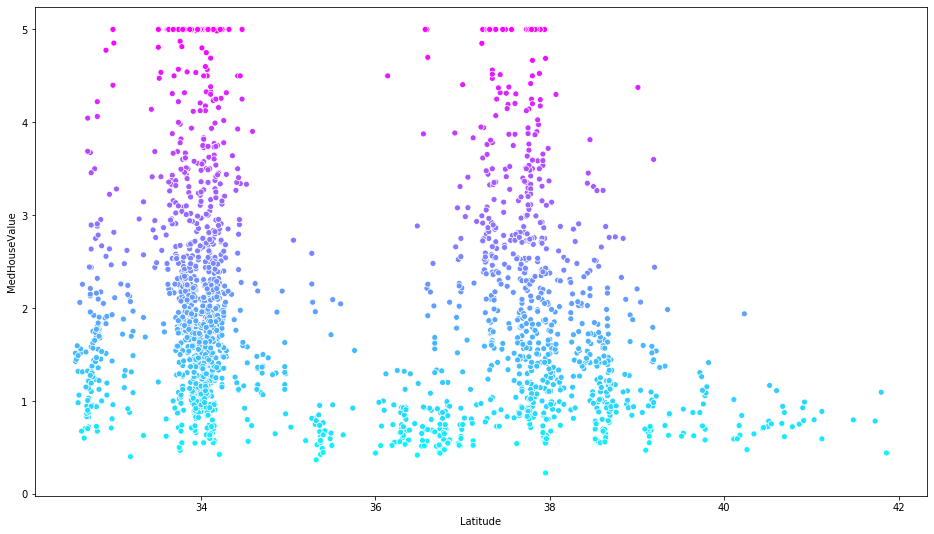

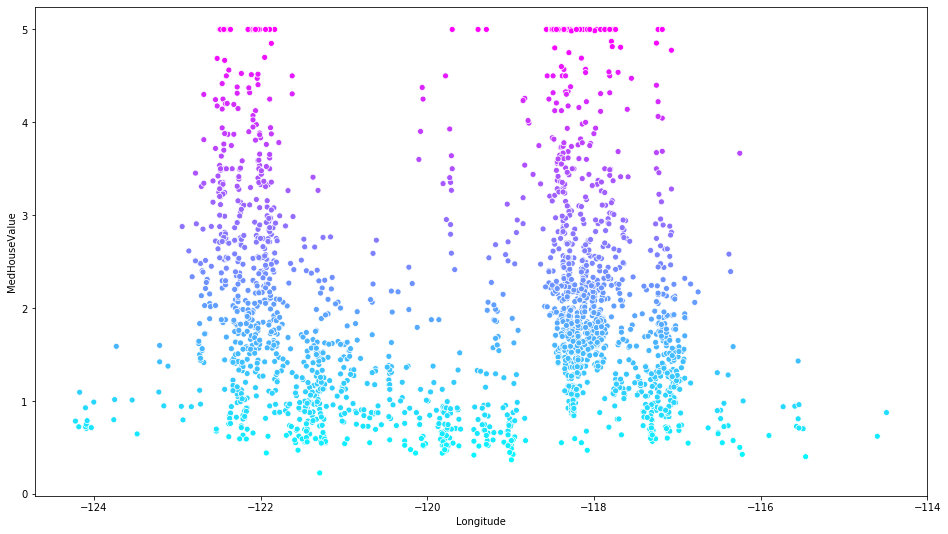

In [166]:
for feature in california.feature_names:
    ...:     plt.figure(figsize=(16,   9))
    ...:     sns.scatterplot(data=sample_df, x=feature,
    ...:                     y='MedHouseValue',   hue='MedHouseValue',
    ...:                     palette='cool',   legend=False)

In [167]:
from   sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test =   train_test_split(
    ...:     california.data, california.target,   random_state=11)

In [169]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
predicted = linear_regression.predict(X_test)

In [171]:
expected = y_test

In [172]:
df = pd.DataFrame()
df['Expected'] =   pd.Series(expected)
df['Predicted'] =   pd.Series(predicted)

In [173]:
figure = plt.figure(figsize=(9, 9))

<Figure size 648x648 with 0 Axes>

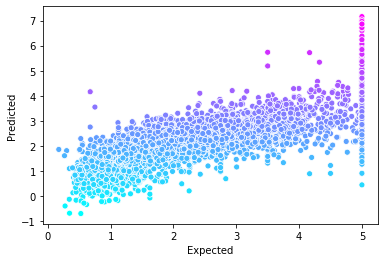

In [174]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    ...:     hue='Predicted',   palette='cool', legend=False)

In [176]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
print(axes.set_xlim(start, end))
print(axes.set_ylim(start, end))

(-0.6830978604144491, 7.155719818496834)
(-0.6830978604144491, 7.155719818496834)


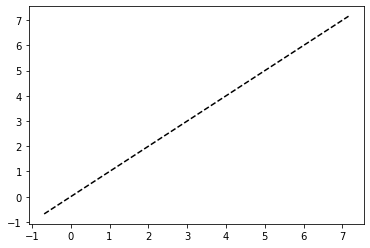

In [177]:
line = plt.plot([start, end], [start, end], 'k--')

In [178]:
from sklearn import metrics

In [179]:
metrics.r2_score(expected, predicted)

0.6008983115964333

In [180]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449119

In [181]:
from   sklearn.linear_model import ElasticNet, Lasso,   Ridge

In [182]:
estimators = {
    ...:     'LinearRegression':   linear_regression,
    ...:     'ElasticNet':   ElasticNet(),
    ...:     'Lasso': Lasso(),
    ...:     'Ridge': Ridge()
    ...: }

In [183]:
from   sklearn.model_selection import KFold, cross_val_score

In [184]:
for estimator_name,   estimator_object in estimators.items():
    ...:     kfold = KFold(n_splits=10,   random_state=11, shuffle=True)
    ...:     scores =   cross_val_score(estimator=estimator_object,
    ...:         X=california.data, y=california.target,   cv=kfold,
    ...:         scoring='r2')
    ...:     print(f'{estimator_name:>16}: ' +
    ...:           f'mean of r2   scores={scores.mean():.3f}')

LinearRegression: mean of r2   scores=0.599
      ElasticNet: mean of r2   scores=0.423
           Lasso: mean of r2   scores=0.285
           Ridge: mean of r2   scores=0.599


#### Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction

In [185]:
from sklearn.datasets import load_digits
digits = load_digits()

In [186]:
from sklearn.manifold import TSNE

In [187]:
tsne = TSNE(n_components=2,   random_state=11)

In [188]:
reduced_data = tsne.fit_transform(digits.data)

In [189]:
reduced_data.shape

(1797, 2)

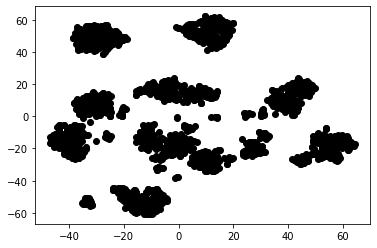

In [190]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
   ...:                    c='black')

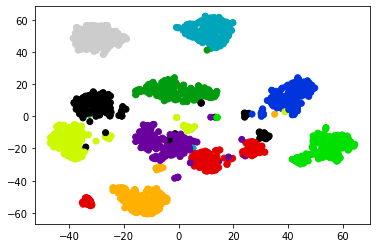

In [191]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
   ...:     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

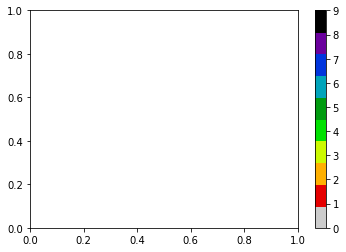

In [192]:
colorbar = plt.colorbar(dots)

In [193]:
from sklearn.datasets import load_iris

In [194]:
iris = load_iris()

In [195]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [196]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [197]:
iris_df['species'] =   [iris.target_names[i] for i in   iris.target]

In [198]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


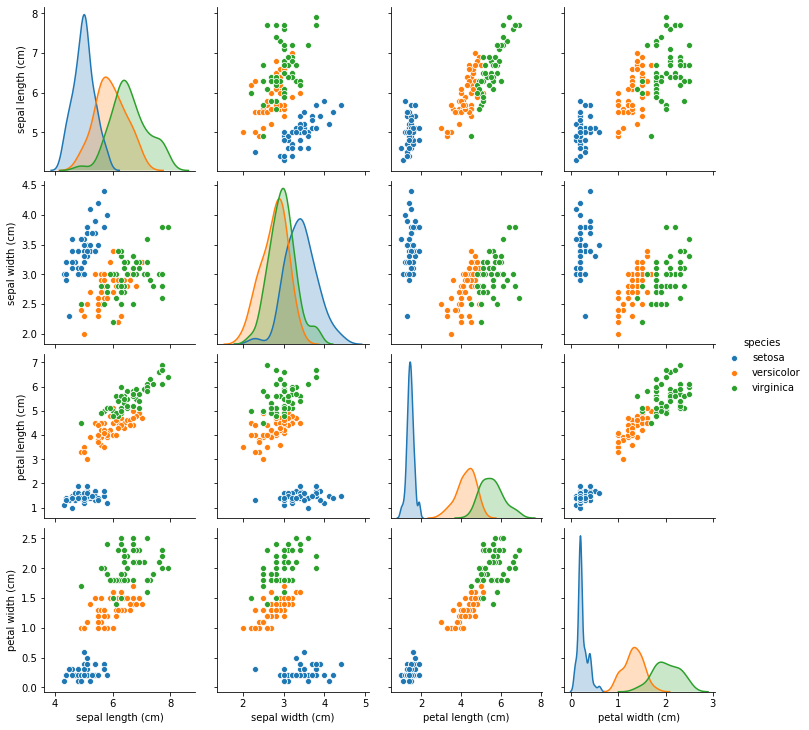

In [199]:
grid = sns.pairplot(data=iris_df,   vars=iris_df.columns[0:4],
    ...:     hue='species')

“Awesome-Public-Datasets,” GitHub.com,
https://github.com/caesar0301/awesome-public-datasets.

“AWS Public Datasets,” https://aws.amazon.com/public-datasets/.

“Big Data And AI: 30 Amazing (And Free) Public Data Sources For 2018,” by B. Marr,
https://www.forbes.com/sites/bernardmarr/2018/02/26/big-data-and-ai-30-amazing-and-free-public-data-sources-for-2018/.

“Datasets for Data Mining and Data Science,” http://www.kdnuggets.com/datasets/index.html.

“Exploring Open Data Sets,” https://datascience.berkeley.edu/open-data-sets/.

“Free Big Data Sources,” Datamics, http://datamics.com/free-big-data-sources/.

Hadoop Illuminated, Chapter 16. Publicly Available Big Data Sets,
http://hadoopilluminated.com/hadoop_illuminated/Public_Bigdata_Sets.html.

“List of Public Data Sources Fit for Machine Learning,”
https://blog.bigml.com/list-of-public-data-sources-fit-for-machine-learning/.

“Open Data,” Wikipedia, https://en.wikipedia.org/wiki/Open_data.

“Open Data 500 Companies,” http://www.opendata500.com/us/list/.

“Other Interesting Resources/Big Data and Analytics Educational Resources and Research,” B. Marr, http://computing.derby.ac.uk/bigdatares/?page_id=223.

“6 Amazing Sources of Practice Data Sets,”
https://www.jigsawacademy.com/6-amazing-sources-of-practice-data-sets/.

“20 Big Data Repositories You Should Check Out,” M. Krivanek,
http://www.datasciencecentral.com/profiles/blogs/20-free-big-data-sources-everyone-should-check-out.

“70+ Websites to Get Large Data Repositories for Free,”
http://bigdata-madesimple.com/70-websites-to-get-large-data-repositories-for-free/.

“Ten Sources of Free Big Data on Internet,” A. Brown,
https://www.linkedin.com/pulse/ten-sources-free-big-data-internet-alan-brown.

“Top 20 Open Data Sources,”
https://www.linkedin.com/pulse/top-20-open-data-sources-zygimantas-jacikevicius.

“We’re Setting Data, Code and APIs Free,” NASA, https://open.nasa.gov/open-data/.

“Where Can I Find Large Datasets Open to the Public?” Quora,
https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public.